In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
# Функция печати изображения в монохромном формате

def imshow(img, cmap = "gray"):
    plt.imshow(img, cmap)
    plt.show()     

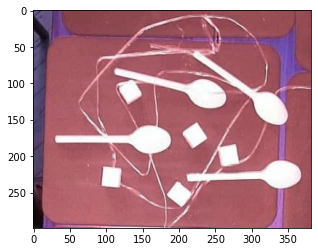

In [4]:
img = cv2.imread("spoons.jpg")
plt.imshow(img)

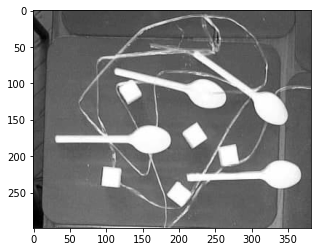

In [5]:
# Перевод изображения в монохромное

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow(gray)

In [6]:
# Пороговое преобразование при помощи Оцу

thresh, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
thresh

167.0

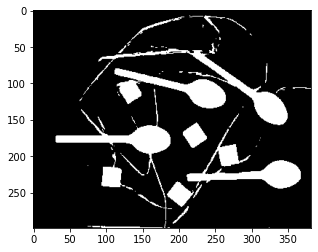

In [7]:
imshow(binary)

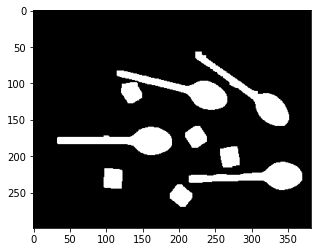

In [10]:
# Избавление от "шума" размыканием: сначала эрозия, потом наращивание 

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(4, 4))
morph_open = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations = 2)
imshow(morph_open)

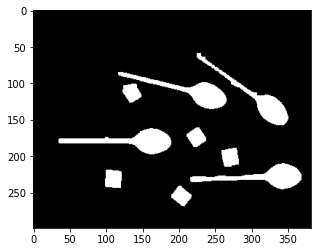

In [8]:
# Применение эрозии для чёткого выделения предметов на изображении

erosion = cv2.erode(morph_open, kernel, iterations = 1)
imshow(erosion)

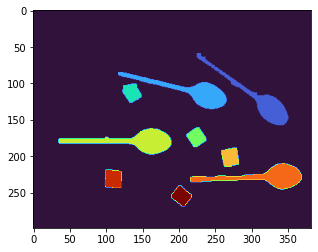

In [9]:
# Выделение и подсчёт компонент. Также, как отдельная компонента учитывается и фон

count_components, markers = cv2.connectedComponents(erosion)
imshow(markers, cmap = "turbo")

In [10]:
count_components

10

In [11]:
# Чтобы отделить ложки от кубиков сахара, можно разделить компоненты на большие (ложки), и маленькие (кубики).
# Каждый маркер содержит в себе количество пикселей объекта. Можно объекты по количеству пикселей.
# Взять среднее взвешенное значение пикселей, и его принять за разграничитель
# Очевидно, что наибольшей по размеру компонентой будет фон. Его не нужно учитывать.

background = 0 
max_pix = 0
for i in range(count_components):
    pix_count = len(markers[markers==i])
    if (pix_count > max_pix):
        max_pix = pix_count
        background = i
print("Номер маркера фона: ",background)

Номер маркера фона:  0


In [12]:
# Подсчёт среднего взвешенного

avg = 0
avg += len(markers[markers!=background])
avg /= (count_components-1)
avg

1160.0

In [13]:
# Объекты без фона. Посчитаем ложки и кубики

spoons = 0
cubes = 0

for i in range(1, count_components):
    pix_count = len(markers[markers==i])
    if (pix_count > avg):
        spoons+=1
    else:
        cubes +=1     
print("Ложки: ", spoons, "; кубики сахара: ", cubes) 

Ложки:  4 ; кубики сахара:  5
